# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2]:
data = pd.read_csv(r'C:\Users\Elina\Desktop\Master\python\unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [7]:
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [9]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


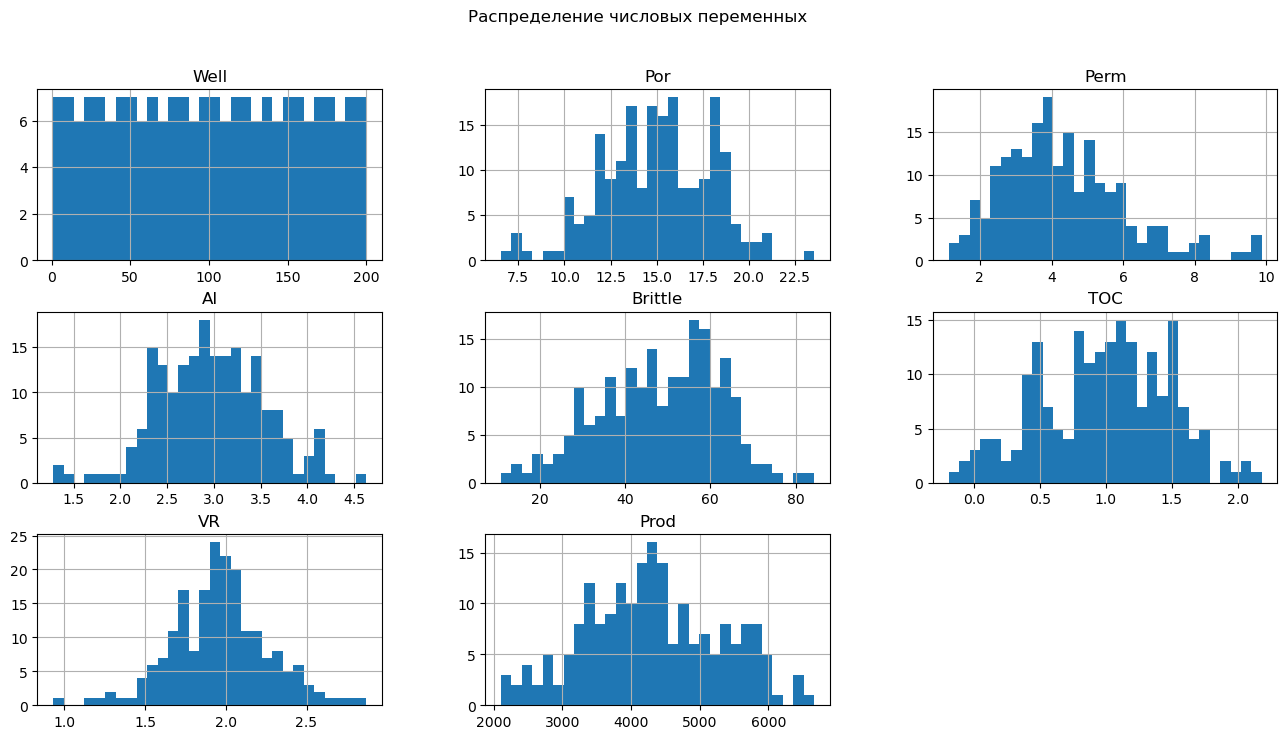

In [11]:
data.hist(bins=30, figsize=(16, 8))
plt.suptitle('Распределение числовых переменных')
plt.show()

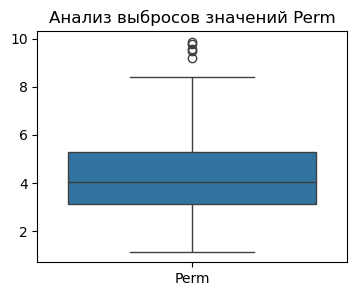

In [13]:
plt.figure(figsize=(4, 3))
sns.boxplot(data=data[['Perm']])
plt.title('Анализ выбросов значений Perm')
plt.show()

>- мы имеем информацию по 20 скважинам, пропуски информации отсутствуют
>- все переменные являются числовыми, категориальные переменные отсутствуют
>- Well - номер скважины от 1 до 200 не дает никакой вклад в анализ. Для построения качественной модели данный показатель будет необходим удалить
>- Порядок значений фичей различный - от наименьшего (TOC со средним 0.99) до наибольшего (Brittle со средним 48) разница в 48 раз. В процессе построения моделей значения будет необходимо стандартизировать
>- TOC - единственный признак, у которого есть отрицательное значение. Измеряется в процентах. Возможно, ошибка. Было бы хорого для построения качественной модели избавиться от этого показателя
>- визуально распеределения Prod и Perm кажутя наиболее похожими, что, скорее всего, показывает на их высокую корреляцию
>- вероятные выбросы присутсвуют у Perm

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

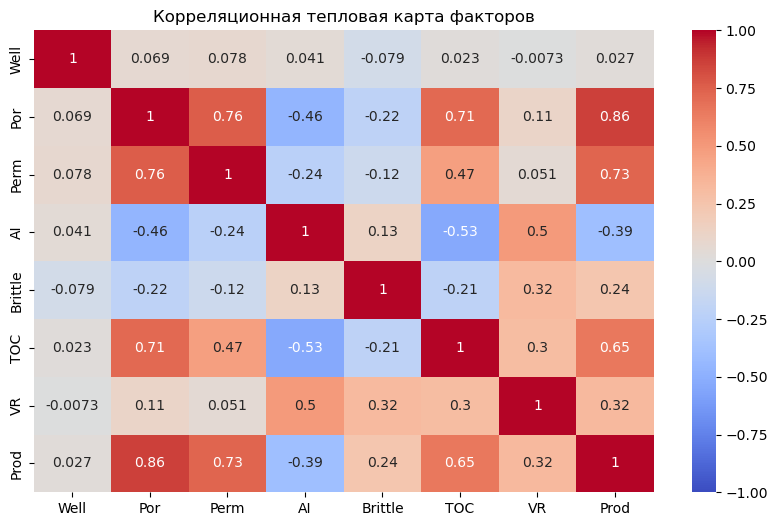

Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы: 0.0007299388072652082


In [5]:
# построение и печать корреляционной матрицы
corrm = data.corr()

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(corrm, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Настройки графика
plt.title('Корреляционная тепловая карта факторов')
plt.show()

# вычисление ранга и определителя матрицы
rk_corr = np.linalg.matrix_rank(corrm)
det_corr = np.linalg.det(corrm)
print('Ранг корреляционной матрицы:', rk_corr)
print('Определитель корреляционной матрицы:', det_corr)



>- Ранг корреляционной матрицы равен 8, что соответствует числу столбцов - матрица не является вырожденной
>- Определитель матрицы близок к нулю - матрица является плохо обусловленной 
>- с целевой переменной (Prod) сильнее всего коррелируют: Por (коэффициент корреляции равен 0,86), Perm (0,73) и TOC (0,65)
>- чистой коллинеарности в данных нет, так как ранг матрица полный, а значит нет линейнозависимых столбцов
>- присутствует мильтиколлинеарность между Perm и Por, а так же TOC и Por. Для построения качественной модели линейной регрессии 
нам необходимо избавиться от одного из факторов в каждой паре
>- мы можем использовать модель линейной регрессии по методу наименьших квадратов. Однако в нашем случае, имея мультиколлинеарности, коэффициенты линейной регрессии могут стать неустойчивыми (то есть показывать неправильные, противоположные зависимости) и разброс коэффициентов может быть большим 

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [5]:
# Создаем матрицу наблюдений Χ и вектор правильных ответов y
Well, Por, Perm, AI, Brittle, TOC, VR  = data['Well'], data['Por'], data['Perm'], data['AI'], data['Brittle'], data['TOC'], data['VR']
Χ1 =  np.column_stack((np.ones(200), Well, Por, Perm, AI, Brittle, TOC, VR))
y = data['Prod'].values
#по модели линейной регресии расчитваем вектор коэффициентов и выводим его с округлением до целого числа
w1 = np.linalg.inv(Χ1.T@Χ1)@Χ1.T@y
w1_rounded = np.round(w1)
print('Коэффициенты для линейной регрессии:', w1_rounded)


Коэффициенты для линейной регрессии: [-1232.     0.   230.   116.  -365.    25.   -78.   785.]


>- Номер скважины можно назвать неинформативным для предсказания размера добычи газа в сутки, так как коэффициент перед ним равен 0, то есть данный предикт не имеет влияния на значение целевой переменной
>- Наибольшее влияние на целевую переменную оказвает изменение в значении VR (коэффициент отражения витринита (%)). При увеличении его на 1 процентный пункт значение целевой переменной (добыча газа в сутки) повышается на 785 млн. кубических футов
>- Обратно пропорциональная зависимость существует между AI — акустический импеданс (кгм) и целевой переменной. При уменьшении значения AI на 1, размер добычи газа в сутки увеличивается на 365 млн. кубических футов футов).

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [7]:
#создаем вектор с показателями новой скважины и рассчитываем прогнозное значение целевой переменной по модели линейной регрессии для нее
Χ_new = np.array([1, 106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
y_new_predict =Χ_new@w1_rounded
print('Прогноз выработки газа для новой скважины (в миллионах кубических футов в день):', y_new_predict)

#находим размер абсолютной ошибки прогноза для новой скважины
mistake = abs(np.round((4748.315024 - y_new_predict),6))
print('Абсолютная ошибка прогноза для новой скважины (в миллионах кубических футов в день):', mistake)

# прогнозируем выработку газа для всех скважин из обучающего набора данных
y_predict1 = Χ1@w1_rounded

# рассчитываем метрику MAE и ΜSE для оценки качества модели
MAE1 = np.round(np.mean(np.abs(y-y_predict1)), 6)
MSE1 = np.round(np.mean((y - y_predict1)**2), 6)
print('MAE:', MAE1)
print('MSE:', MSE1)


Прогноз выработки газа для новой скважины (в миллионах кубических футов в день): 4715.26
Абсолютная ошибка прогноза для новой скважины (в миллионах кубических футов в день): 33.055024
MAE: 154.558043
MSE: 39384.740801


>Для оценки моделей мной выбраны метрики MAE и MSE.
>- MAE (средняя абсолютная ошибка) равна 154.558043 означает, что модель в среднем ошибается при прогнозировании объема добычи скважины на 154.558043 миллионов кубических футов в день
>- MSE (среднеквадратичная ошибка) сотавляет 39384.740801, что показывает среднеквадратичное отклонение прогнозируемых значений от фактических значений составляет 39384.740801 миллионов кубических футов в день

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [9]:
comparison = {'Коэффициенты корреляции':[0.027, 0.86, 0.73, -0.39, 0.24, 0.65, 0.32], 
              'Коэффициенты линейной регресии': [0, 230, 116, -365, 25, -78, 785]}
comparison = pd.DataFrame(comparison, index = ['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR'])
comparison

,Коэффициенты корреляции,Коэффициенты линейной регресии
Well,0.027,0
Por,0.860,230
Perm,0.730,116
AI,-0.390,-365
Brittle,0.240,25
TOC,0.650,-78
VR,0.320,785


> В построенной модели линейной регресии коэффициент при признаке TOC равено -78, что противоречит коэффициенту корреляции этого признака с целевой переменной, который равен 0.650. То есть коэффицент корреляции показывает прямую зависисмоть, а коэффициент линейной регресии - обратную. Это модет быть связяно с мультиколлинеарностью, которая присутстует в наших данных ?

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [11]:
# В соответствии с алгоритмом описанным в условии задачи, убираем факторы Well, Perm, TOC
# Создаем матрицу наблюдений Χ и вектор правильных ответов y 
X2 =  np.column_stack((np.ones(200), Por, AI, Brittle, VR))
# по модели линейной регресии расчитваем вектор коэффициентов и выводим его с округлением до целого числа
w2 = np.linalg.inv(X2.T@X2)@X2.T@y
w2_rounded = np.round(w2)
print('Коэффициенты для линейной регрессии без сильнокоррелирующих факторов:', w2_rounded)
# прогнозируем выработку газа для всех скважин из обучающего набора данных
y_predict2 = X2@w2_rounded
# рассчитываем метрику MAE и ΜSE для оценки качества модели
MAE2 = np.round(np.mean(np.abs(y-y_predict2)), 4)
MSE2 = np.round(np.mean((y - y_predict2)**2), 4)
print('MAE:', MAE2)
print('MSE:', MSE2)


Коэффициенты для линейной регрессии без сильнокоррелирующих факторов: [-1835.   293.  -200.    28.   517.]
MAE: 171.8683
MSE: 53958.4372


>- По прежнему наибольшее влияние на целевую переменную оказывает изменение в значении VR (коэффициент отражения витринита (%)). При увеличении его на 1 процентный пункт значение целевой переменной (добыча газа в сутки) повышается на 517 млн. кубических футов. Однако степень его влияния сократилась, в предыдущей модели коэффициент был равен 785. >- Так же сохранилась обратно пропорциональная зависимость между AI — акустический импеданс (кгм) и целевой переменной. При уменьшении значения AI на 1, размер добычи газа в сутки увеличивается на2005 млн. кубических футов футо. В предыдущей модели влияние было больше и коэффициент составлял -365.
>- Метрика MAE равна 171.8683. Это означает, что модель в среднем ошибается при прогнозировании объема добычи скважины на 171.8683 миллионов кубических футов в день. MAE в предыдущей модели была 154, то есть метрика, а следовательно и модель, ухудшились
>- Метрика MSE сотавляет 53958.4372, что показывает среднеквадратичное отклонение прогнозируемых значений от фактических значений. Данная метрика свои увеличением так же показывает ухудшение модели
>- Ппротиворечие коэффициентов линейной регрессии и коэффициентов корреляци для предикта TOC удалось побороть исключением из модели признака TOC

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [13]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# создаём модель линейной регрессии из Sklearn
model = LinearRegression(fit_intercept=False)
# вычисляем коэффициенты регрессии
model.fit(X2, y)
print('Коэффициенты линейной регрессии расчитанной в Sklearn', np.round(model.coef_))
y_predict3 = model.predict(X2)
#рассчитываем метрику MAE и ΜSE для оценки качества модели
MAE3 = round((mean_absolute_error(y, y_predict3)), 6)
MSE3 = round((mean_squared_error(y, y_predict3)), 6)
print('MAE:', MAE3)
print('MSE:', MSE3)

Коэффициенты линейной регрессии расчитанной в Sklearn [-1835.   293.  -200.    28.   517.]
MAE: 171.431461
MSE: 53660.854579


> Коэффициенты линейных регрессий расчитанные через Numpy и Sklearn и округленные до целого числа - одинаковые.
> Метрики оценки моделей имеют различия связанные с округлением.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [15]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Создаем матрицу наблюдений без единичного вектора в начале
Χ4 = np.column_stack((Por, AI, Brittle, VR))
# Стандартизируем признаки
scaler = StandardScaler()
Χ4_scaled = scaler.fit_transform(Χ4)
# генерируем полиномиальные признаки третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
Χ4_poly = poly.fit_transform(Χ4_scaled)
# Обучаем модель линейной регрессии
lr = LinearRegression().fit(Χ4_poly, y)
y_predict4 = lr.predict(Χ4_poly)
# Оцениваем качество модели на кросс-валидации с MAE и MSE
cv_results_mae = cross_validate(lr, Χ4_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
cv_results_mse = cross_validate(lr, Χ4_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
MAE_train4 = -cv_results_mae['train_score'].mean()
MAE_val4 = -cv_results_mae['test_score'].mean()
MSE_train4 = -cv_results_mse['train_score'].mean()
MSE_val4 = -cv_results_mse['test_score'].mean()
print('MAE на тренировочных фолдах:', MAE_train4)
print('MAE на валидационных фолдах:', MAE_val4)
print('MSE на тренировочных фолдах:', MSE_train4)
print('MSE на валидационных фолдах:', MSE_val4)

MAE на тренировочных фолдах: 75.34530982164875
MAE на валидационных фолдах: 110.47360945494037
MSE на тренировочных фолдах: 10162.074118334853
MSE на валидационных фолдах: 24335.089264945196


> Если сравнивать метрики новой модели с метриками полученными от модели линейной регрессии, то можно отметить существенное снижением размера метрик, то есть улучшение модели. Однако, при сравнении метрик на тренировочных и валидационных фолдах, видно, что модель имеет проблемы с обобщением на новые данные, так как ошибка на валидационных фолдах значительно выше, чем на тренировочных. Вероятно, имеет место переобучение модели. дсказаний.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [19]:
# Создаем матрицу наблюдений без единичного вектора в начале
X5 = np.column_stack((Por, AI, Brittle, VR))
# Стандартизируем признаки
scaler = StandardScaler()
X5_scaled = scaler.fit_transform(X5)
# генерируем полиномиальные признаки третьего порядка
poly = PolynomialFeatures(degree=3, include_bias=False)
X5_poly = poly.fit_transform(X5_scaled)
# Задаем список значений alpha, которые хотим попробовать
alpha_values = np.arange(0.01, 10, 0.5)
# Создаем модель Ridge
lasso = Lasso()
# Создаем объект GridSearchCV для подбора alpha с помощью кросс-валидации по MAE
lasso_search = GridSearchCV(estimator=lasso, param_grid={'alpha': alpha_values}, scoring='neg_mean_absolute_error', cv=5)
# Обучаем модель на данных
lasso_search.fit(X5_poly, y)
# Выводим наилучшее значение alpha
print("Лучшая альфа, выбранная по MAE:", lasso_search.best_params_['alpha'])
# Выводим лучшее значение MSE
print("Лучщее значение MAE:", -lasso_search.best_score_)
# Создаем объект GridSearchCV для подбора alpha с помощью кросс-валидации по MSE
lasso_search = GridSearchCV(estimator=lasso, param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=5)
# Обучаем модель на данных
lasso_search.fit(X5_poly, y)
# Выводим наилучшее значение alpha
print("Лучшая альфа, выбранная по MSE:", lasso_search.best_params_['alpha'])
# Выводим лучшее значение MSE
print("Лучщее значение MSE:", -lasso_search.best_score_)

C:\Users\Elina\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.430e+05, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Elina\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.398e+05, tolerance: 1.545e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Elina\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.606e+05, toleranc

Лучшая альфа, выбранная по MAE: 4.51
Лучщее значение MAE: 95.68127909312639
Лучшая альфа, выбранная по MSE: 6.01
Лучщее значение MSE: 17189.43169327791


C:\Users\Elina\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.430e+05, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Elina\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.398e+05, tolerance: 1.545e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Elina\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.606e+05, toleranc

In [21]:
# создаём модель линейной регрессии c L1-регуляризацией и полученным лучшим значением альфа
lasso = Lasso(alpha=4.51, max_iter=10000)
lasso.fit(X5_poly, y)
# Оцениваем качество модели на кросс-валидации с MAE и MSE
cv_results_mae = cross_validate(lasso, X5_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
cv_results_mse = cross_validate(lasso, X5_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
MAE_train5 = -cv_results_mae['train_score'].mean()
MAE_val5 = -cv_results_mae['test_score'].mean()
MSE_train5 = -cv_results_mse['train_score'].mean()
MSE_val5 = -cv_results_mse['test_score'].mean()
print('MAE на тренировочных фолдах:', MAE_train5)
print('MAE на валидационных фолдах:', MAE_val5)
print('MSE на тренировочных фолдах:', MSE_train5)
print('MSE на валидационных фолдах:', MSE_val5)

MAE на тренировочных фолдах: 77.95196008540717
MAE на валидационных фолдах: 95.68127909312639
MSE на тренировочных фолдах: 11296.602373235955
MSE на валидационных фолдах: 17377.07562178096


>У построенной модели увеличились метрики на тренировочных фолдах, но сократились на валидационных. При подобранном значении альфа разница в метриках
>между тренировочными и валидационными фолдами значительно меньше, чем в модели без регуляризации. То есть модель показывает себя наилучшим образом, переобучения нет  
>

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [23]:
# Задаем список значений alpha, которые хотим попробовать
alpha_values = np.arange(0.01, 10, 0.01)
# Создаем модель Ridge
ridge = Ridge()
# Создаем объект GridSearchCV для подбора alpha с помощью кросс-валидации по MAE
grid_search = GridSearchCV(estimator=ridge, param_grid={'alpha': alpha_values}, scoring='neg_mean_absolute_error', cv=5)
# Обучаем модель на данных
grid_search.fit(X5_poly, y)
# Выводим наилучшее значение alpha
print("Лучшая альфа, выбранная по MAE:", grid_search.best_params_['alpha'])
# Выводим лучшее значение MSE
print("Лучщее значение MAE:", -grid_search.best_score_)
# Создаем объект GridSearchCV для подбора alpha с помощью кросс-валидации по MSE
grid_search = GridSearchCV(estimator=ridge, param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=5)
# Обучаем модель на данных
grid_search.fit(X5_poly, y)
# Выводим наилучшее значение alpha
print("Лучшая альфа, выбранная по MSE:", grid_search.best_params_['alpha'])
# Выводим лучшее значение MSE
print("Лучщее значение MSE:", -grid_search.best_score_)

Лучшая альфа, выбранная по MAE: 0.21000000000000002
Лучщее значение MAE: 110.06926625548381
Лучшая альфа, выбранная по MSE: 0.65
Лучщее значение MSE: 23804.637643368307


In [25]:
# создаём модель линейной регрессии c L2-регуляризацией
ridge = Ridge(alpha=0.21, solver='svd')
# Оцениваем качество модели на кросс-валидации с MAE и MSE
cv_results_mae = cross_validate(ridge, X5_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
cv_results_mse = cross_validate(ridge, X5_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
MAE_train6 = -cv_results_mae['train_score'].mean()
MAE_val6 = -cv_results_mae['test_score'].mean()
MSE_train6 = -cv_results_mse['train_score'].mean()
MSE_val6 = -cv_results_mse['test_score'].mean()
print('MAE на тренировочных фолдах:', MAE_train6)
print('MAE на валидационных фолдах:', MAE_val6)
print('MSE на тренировочных фолдах:', MSE_train6)
print('MSE на валидационных фолдах:', MSE_val6)

MAE на тренировочных фолдах: 75.4136715473398
MAE на валидационных фолдах: 110.06926625548394
MSE на тренировочных фолдах: 10186.300659799908
MSE на валидационных фолдах: 24002.544936059472


> Разница между метриками на тренировочных и валидационных фолдах и метрики на валидационных фолдах увеличились по сравнению с моделью с L1 регуляризацией, что говорит о меньшей эффектривности модели

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [27]:
#Список значений alpha, которые хотим попробовать
alpha_values = np.arange(0.01, 10, 0.5)
l1_ratio_values = np.arange(0.01, 10, 0.5)
#Создаем модель ElasticNet
elastic_net = ElasticNet()
#Создаем объект GridSearchCV для подбора alpha с помощью кросс-валидации для ElasticNet
elastic_net_grid_search_alpha = GridSearchCV(estimator=elastic_net, param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=5)
elastic_net_grid_search_l1_ratio = GridSearchCV(estimator=elastic_net, param_grid={'l1_ratio': l1_ratio_values}, scoring='neg_mean_squared_error', cv=5)
#Обучаем модель ElasticNet на данных
elastic_net_grid_search_alpha.fit(X5_poly, y)
elastic_net_grid_search_l1_ratio.fit(X5_poly, y)
#Выводим наилучшее значение alpha для ElasticNet
print("Лучшая альфа, выбранная по MSE:", elastic_net_grid_search_alpha.best_params_['alpha'])
#Выводим лучшее значение MSE для ElasticNet
print("Лучшая MSE", -elastic_net_grid_search_alpha.best_score_)

#Выводим наилучшее значение alpha для ElasticNet
print("Лучшая l1_ratio, выбранная по MSE:", elastic_net_grid_search_l1_ratio.best_params_['l1_ratio'])
#Выводим лучшее значение MSE для ElasticNet
print("Лучшая MSE", -elastic_net_grid_search_l1_ratio.best_score_)


C:\Users\Elina\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.069e+05, tolerance: 1.612e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Elina\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.849e+05, tolerance: 1.545e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Elina\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.049e+04, toleranc

Лучшая альфа, выбранная по MSE: 0.01
Лучшая MSE 23812.485568697903
Лучшая l1_ratio, выбранная по MSE: 0.51
Лучшая MSE 144942.05756763526


C:\Users\Elina\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
90 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Elina\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Elina\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Elina\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Elina\anaconda3\Lib\site-packages\

In [29]:
# создаём модель линейной регрессии c L1- и L2-регуляризациями
ElasticNet = ElasticNet(alpha=0.01, l1_ratio=0.51, max_iter=10000)
# Оцениваем качество модели на кросс-валидации с MAE и MSE
cv_results_mae = cross_validate(ElasticNet, X5_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
cv_results_mse = cross_validate(ElasticNet, X5_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
MAE_train7 = -cv_results_mae['train_score'].mean()
MAE_val7 = -cv_results_mae['test_score'].mean()
MSE_train7 = -cv_results_mse['train_score'].mean()
MSE_val7 = -cv_results_mse['test_score'].mean()
print('MAE на тренировочных фолдах:', MAE_train7)
print('MAE на валидационных фолдах:', MAE_val7)
print('MSE на тренировочных фолдах:', MSE_train7)
print('MSE на валидационных фолдах:', MSE_val7)

MAE на тренировочных фолдах: 76.61320177083549
MAE на валидационных фолдах: 110.90639654781486
MSE на тренировочных фолдах: 10396.804595537196
MSE на валидационных фолдах: 23794.658812956335


>  Разница между метриками на тренировочных и валидационных фолдах и метрики на валидационных фолдах увеличились по сравнению с моделью с L1 регуляризацией, что говорит о меньшей эффектривности модели

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [37]:
result = {
'Модель': ['Линейная регрессия', 'Линейная регрессия с урезанными признаками', 'Sklearn', 'Полиномиальная регрессия', 'L1 регуляризация', 'L2 регуляризация', 'Elastic net'],
'Гиперпараметры': ['', '', '', '', 'alpha=4.51', 'alpha=0.21', 'alpha=0.01, l1_ratio=0.51'],
'Полином признаки': ['нет', 'нет', 'нет', 'да', 'да', 'да', 'да'],
'MAE трен': [MAE1, MAE2, MAE3, MAE_train4, MAE_train5, MAE_train6, MAE_train7],
'MAE валид':['', '', '', MAE_val4, MAE_val5, MAE_val6, MAE_val7],
'MSE трен': [MSE1, MSE2, MSE3, MSE_train4, MSE_train5, MSE_train6, MSE_train7 ],
'MSE валид': ['', '', '', MSE_val4, MSE_val5, MSE_val6, MSE_val7],   
}
result = pd.DataFrame(result)
display(result)

,Модель,Гиперпараметры,Полином признаки,MAE трен,MAE валид,MSE трен,MSE валид
0,Линейная регрессия,,нет,154.558043,,39384.740801,
1,Линейная регрессия с урезанными признаками,,нет,171.868300,,53958.437200,
2,Sklearn,,нет,171.431461,,53660.854579,
3,Полиномиальная регрессия,,да,75.345310,110.473609,10162.074118,24335.089265
4,L1 регуляризация,alpha=4.51,да,77.951960,95.681279,11296.602373,17377.075622
5,L2 регуляризация,alpha=0.21,да,75.413672,110.069266,10186.300660,24002.544936
6,Elastic net,"alpha=0.01, l1_ratio=0.51",да,76.613202,110.906397,10396.804596,23794.658813


> - Модель полиномиальной регрессии с полиномиальными признаками показала результат с самым низким значением средней абсолютной ошибки (MAE) на тренировочной выборке (75.35). При этом у данной модели наибольщая разница в метриках между тренировочными и валидационными фолдами, что являеся показателем переобученности модели.
> - Модель регрессии с регуляризацией L2  и модель Elastic Net так же демонстрируют переобученность 
> - Модель регрессии с регуляризацией L1 показала наименьшую разницу в метриках между тренировочной выборкой и валидационной и наименьшие метрики на валидационных выборках. То есть данная модель оказалась обученной наилучшим образом.
> Таким образом, для данного набора данных модель регрессии с регуляризацией L1и оказалась наиболее эффективной в прогнозировании целевой переменной.